<a href="https://colab.research.google.com/github/Pondza555/Fraud-Detection/blob/main/Credit_Fraud_Detection_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection

## 0. Set basics library & dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Dataset/creditcard.csv")

## 1. Explore data

### 1.1 view data

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### 1.2 check NULL

There is no NULL so I don't need to handle it.

In [ ]:
df.isnull().sum().max()

0

### 1.3 check fraud percentage

*   Check if data is balance or not, it not balance.
*   We can use oversampling and undersampling to solve this problem, but there is trade-off which I will talk to it later.

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


### 1.4 check distribution

* Bad distribution cause model to weight the feature badly.
* We can scaling data by standard or robust, I decide to use robust to manage outliner as you see transaction amount has a lot outliner.

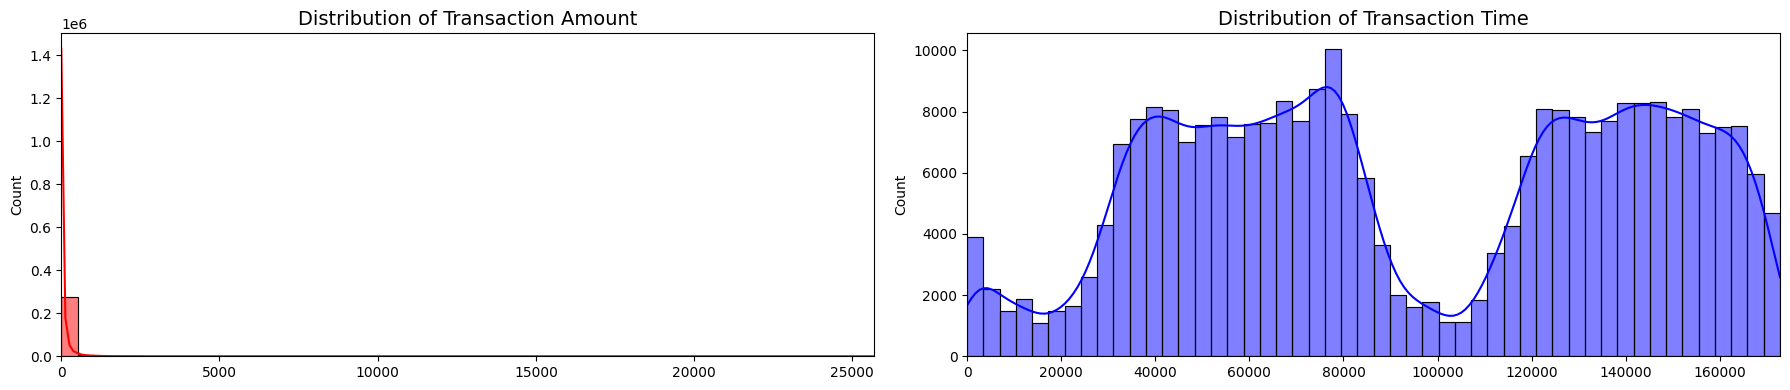

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], kde=True, color='r', bins=50)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], kde=True, color='b', bins=50)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.tight_layout()
plt.show()

## 2. Adjust data

### 2.1 Scaling time & amount

*   Using RobustScaler to manage outliner

In [2]:
from sklearn.preprocessing import RobustScaler

rob_scal = RobustScaler()

In [3]:
df['scaled_amount'] = rob_scal.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scal.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

### 2.2 Move the variable we are interested in to the front for ease of use.

In [4]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### 2.3 Shuffle & Split data



*   Split data for training and test data using 20% for testing because many people prefer this ratio.
*   Don't forget to stratify the data to make "Class" stable which good for train model in imbalance dataset
*   Use random_state to shuffle the priority of data which make model don't forget the priority pattern



In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=77)

## 3. Modeling

### 3.1 Focus on F1-score

*   I choose to use logistic regression to classify fraud and non-fraud due to fast calculate.
*   SMOTE ratio I use is 0.5%, 0.75%, 1% why I not use more like 10% 30% 50%? because our fraud data is only 0.17% this mean if you want like 10%, it 60x of original data, it cause fraud data aren't diverse which make model overfitting.
*   Why not undersampling? because model will not memory non-fraud pattern, it will make model less accuracy to detect both fraud and non-fraud.
*   During training I don't know what is the best hyperparameter so I decide to use gridsearch on common hyperparameter adjusted to find the best.
*   As you see in all ratio result, Best Params: {'clf__C': 0.01, 'clf__class_weight': None}, this data fit with C = 0.01 means the model does not remember too many values​ from training. Weight = None means lt the model learn in real proportion than using more weight on less "Class".
*   "solver = liblinear" means the formula used to train our logistic regression model. It is suitable for small datasets (around 100,000) and supports both L1 and L2 tuning, giving us good control over model overfitting and is fast. Penalty I didn't select it because default is L2 means not make all data weight zero because I think all feature is crucial. You may think it overfit but the data is PCA already so overfit is less impact.


=== SMOTE Ratio: 0.005 ===


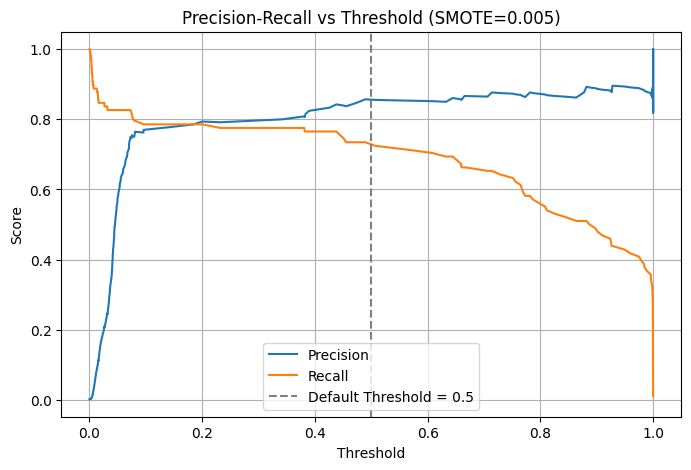


Model: Logistic Regression
Best Params: {'clf__C': 0.01, 'clf__class_weight': None}
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     56864
           1     0.8554    0.7245    0.7845        98

    accuracy                         0.9993     56962
   macro avg     0.9275    0.8621    0.8921     56962
weighted avg     0.9993    0.9993    0.9993     56962


=== SMOTE Ratio: 0.0075 ===


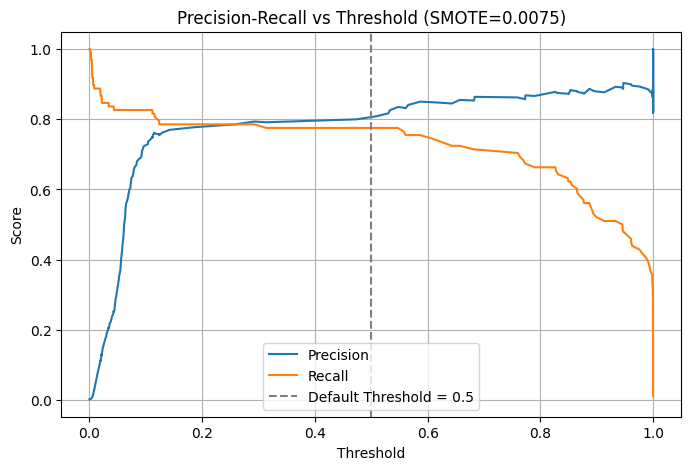


Model: Logistic Regression
Best Params: {'clf__C': 0.01, 'clf__class_weight': None}
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56864
           1     0.8085    0.7755    0.7917        98

    accuracy                         0.9993     56962
   macro avg     0.9041    0.8876    0.8957     56962
weighted avg     0.9993    0.9993    0.9993     56962


=== SMOTE Ratio: 0.01 ===


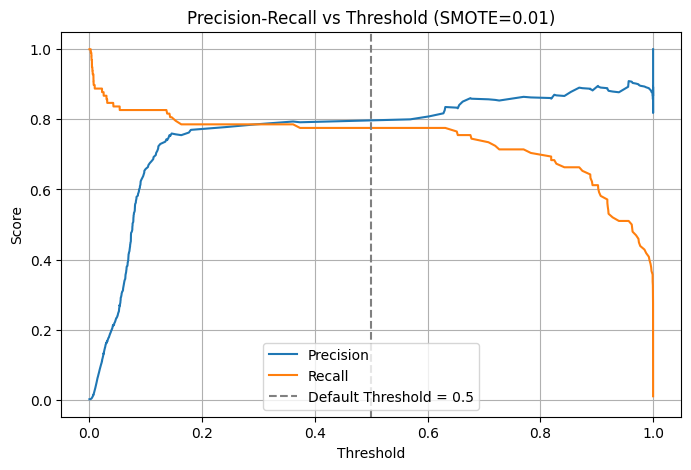


Model: Logistic Regression
Best Params: {'clf__C': 0.01, 'clf__class_weight': None}
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56864
           1     0.8000    0.7755    0.7876        98

    accuracy                         0.9993     56962
   macro avg     0.8998    0.8876    0.8936     56962
weighted avg     0.9993    0.9993    0.9993     56962



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

sampling_ratios = [0.005, 0.0075, 0.01]

param_grids = {
    "Logistic Regression": {
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__class_weight': [None, 'balanced']
    }
}

model_constructors = {
    "Logistic Regression": LogisticRegression(solver='liblinear')
}

for ratio in sampling_ratios:
    print(f"\n=== SMOTE Ratio: {ratio} ===")
    smote = SMOTE(sampling_strategy=ratio, random_state=77)

    for name, base_model in model_constructors.items():
        pipe = Pipeline([
            ('smote', smote),
            ('clf', base_model)
        ])

        search = GridSearchCV(
            estimator=pipe,
            param_grid=param_grids[name],
            scoring='f1', ## f1-score = balance precision and recall
            cv=5, ## 5 = common use
            n_jobs=-1,
            error_score='raise'
        )

        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        y_scores = best_model.predict_proba(X_test)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

        plt.figure(figsize=(8, 5))
        plt.plot(thresholds, precisions[:-1], label='Precision')
        plt.plot(thresholds, recalls[:-1], label='Recall')
        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.title(f'Precision-Recall vs Threshold (SMOTE={ratio})')
        plt.axvline(x=0.5, color='gray', linestyle='--', label='Default Threshold = 0.5')
        plt.legend()
        plt.grid(True)
        plt.show()

        y_pred = (y_scores >= 0.5).astype(int) ## 0.5 = common use
        print(f"\nModel: {name}")
        print("Best Params:", search.best_params_)
        print(classification_report(y_test, y_pred, digits=4, zero_division=0))

### 3.2 Focus on Recall and Model SMOTE 0.005

* I choose SMOTE 0.005 to adjust threshold because in reality transaction it still has less fraud, that why I choose less SMOTE to adjust.  
* Model with SMOTE 0.005 need less threshold to get high recall while balancing precision.
* I gradually decrease threshold by myself until I find the best line.
* Before adjust threshold (look Class = 1), precision = 0.8554, recall = 0.7245, f1-score = 0.7845
* After adjust threshold (look Class = 1), precision = 0.7500, recall = 0.8265, f1-score = 0.7864
* precision decrease 0.1054 (10.54%), reall increase 0.1020 (10.2%), f1-score increase 0.0019 (0.19%)
* This is good for changing threashold to trade-off between precision and recall. Low precision but high recall means you caught more thief and caught more innocent too HAHA.

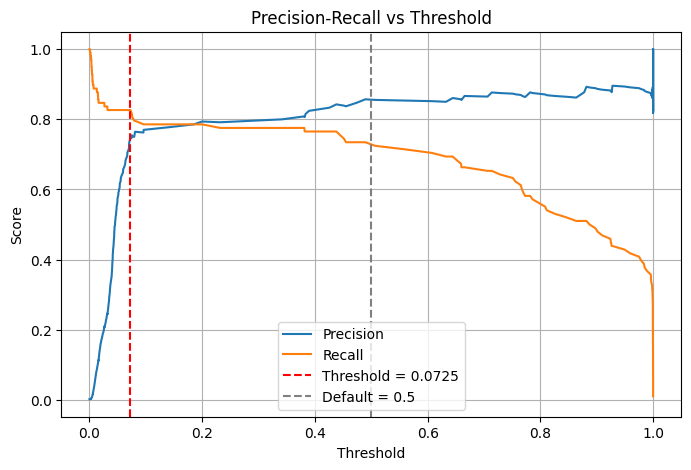

=== Logistic Regression Results ===
SMOTE Ratio: 0.005, Threshold: 0.0725
Params: C=0.01, class_weight=None, solver='liblinear'
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     56864
           1     0.7500    0.8265    0.7864        98

    accuracy                         0.9992     56962
   macro avg     0.8749    0.9130    0.8930     56962
weighted avg     0.9993    0.9992    0.9992     56962



In [7]:
sampling_ratio = 0.005
threshold = 0.0725
model = LogisticRegression(solver='liblinear', C=0.01, class_weight=None)

pipe = Pipeline([
    ('smote', SMOTE(sampling_strategy=sampling_ratio, random_state=77)),
    ('clf', model)
])
pipe.fit(X_train, y_train)

y_scores = pipe.predict_proba(X_test)[:, 1]
y_pred = (y_scores >= threshold).astype(int)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Default = 0.5')
plt.title('Precision-Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

print("=== Logistic Regression Results ===")
print(f"SMOTE Ratio: {sampling_ratio}, Threshold: {threshold}")
print("Params: C=0.01, class_weight=None, solver='liblinear'")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

### 3.3 Weight of feature

* ➕ = tend to fraud
* ➖ = tend to non-fraud
* You can see that V4 most tend to fraud and V14 tend to non-fraud.
* Due to data is PCA to hide blackground information, we only know V4 most tend to be thieves while V14 most tend to be innocent.
* Why not use p-value to see how significance?์ Because it need time to adjust model and not perform well as using all feature in model. If you want to use p-value to know what is the real cause, model will less feature, less performance to predict due to needed p-value to be siginificance (low feature used, make more significance), even you know the cause but that cause is less impact to detect fraud.

In [16]:
coefficients = pipe.named_steps['clf'].coef_[0]
intercept = pipe.named_steps['clf'].intercept_[0]
feature_names = df.drop('Class', axis=1).columns

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

print(f"Intercept (β₀): {intercept:.4f}")

scaled_amount: -0.1860
scaled_time: -0.3693
V1: 0.0150
V2: -0.1814
V3: -0.1093
V4: 0.2898
V5: -0.0660
V6: 0.0558
V7: 0.1580
V8: -0.1918
V9: -0.1775
V10: -0.3204
V11: 0.1126
V12: -0.2597
V13: -0.1320
V14: -0.5035
V15: -0.0746
V16: -0.1945
V17: -0.1319
V18: 0.0209
V19: -0.0375
V20: 0.2213
V21: 0.2062
V22: 0.0989
V23: -0.0595
V24: -0.0133
V25: -0.0699
V26: -0.0001
V27: -0.0034
V28: 0.0646
Intercept (β₀): -5.6008


## 4. Analyze

### 4.1 ROC curve

* AUC = 0.9588 indicates that the model has a strong ability to distinguish between fraudulent and non-fraudulent transactions.

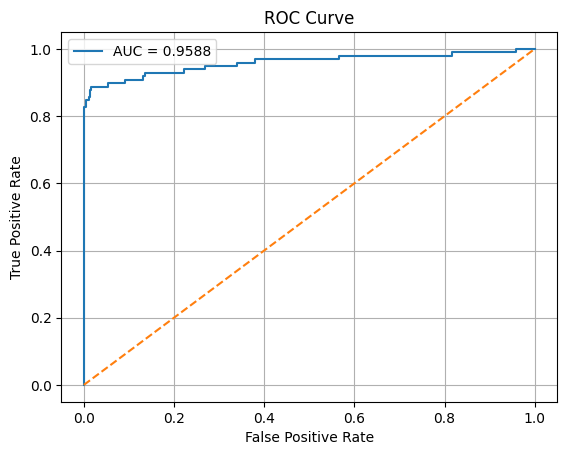

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

### 4.2 Confusion matrix



*  ✅ 56,837 (True Negative) → The model predicted that it was not a fraud and it was not → Correct
* ❌ 27 (False Positive) → The model predicted that it was a fraud but it was not → Costing the business time and cost
* ❌ 17 (False Negative) → The model predicted that it was not a fraud but it was actually a fraud → Very risky
* ✅ 81 (True Positive) → The model predicted that it was a fraud and it was → Our goal!

<Figure size 600x500 with 0 Axes>

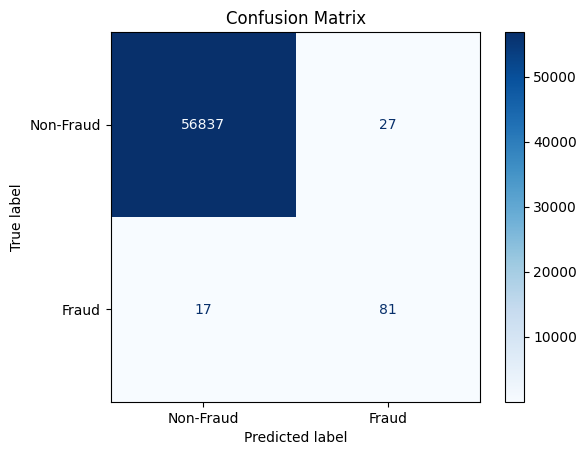

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

### 4.3 Recall & Precision

* Recall tells us how many thieves we have caught, while Precision tells us how many of the thieves we have caught are actually thieves. If Recall is low = we let thieves get away, if Precision is low = we are harassing innocent people.
* In my case, I choose to get higher recall which make precision to be lower. This means my model harrass more innocent but caught more thieves. It up to you what you want more, but mostly in fraud detection case it need to caught the thieves.

In [ ]:
print("=== Logistic Regression Results ===")
print(f"SMOTE Ratio: {sampling_ratio}, Threshold: {threshold}")
print("Params: C=0.01, class_weight=None, solver='liblinear'")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

=== Logistic Regression Results ===
SMOTE Ratio: 0.005, Threshold: 0.0725
Params: C=0.01, class_weight=None, solver='liblinear'
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     56864
           1     0.7500    0.8265    0.7864        98

    accuracy                         0.9992     56962
   macro avg     0.8749    0.9130    0.8930     56962
weighted avg     0.9993    0.9992    0.9992     56962



## 5. The chosen model

### 5.1 Using all data in the chosen model

* After approval the model, you need to use all data to train the model. This help model has all data to use in real scerinao.

In [ ]:
X_full = df.drop('Class', axis=1)
y_full = df['Class']

final_model = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.005, random_state=77)),
    ('clf', LogisticRegression(solver='liblinear', C=0.01, class_weight=None))
])

## don't forget the threshold
## it can use after test with new data
final_model.fit(X_full, y_full)

### 5.2 Dowload Model to your files in google colab

In [ ]:
import joblib
joblib.dump(model, 'fraud_model.pkl')
with open("fraud_threshold.txt", "w") as f:
    f.write("0.0725")

### 5.3 Dowload Model to your google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import joblib
joblib.dump(final_model, '/content/drive/MyDrive/Dataset/Model/fraud_model.pkl')
with open('/content/drive/MyDrive/Dataset/Model/fraud_threshold.txt', 'w') as f:
    f.write("0.0725")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 5.4 For deployment

* This is basics code for using in offine but more than this need to talk with people who take care the service such as Devops, Backend, Software enginneer, etc.

In [ ]:
import joblib

model = joblib.load('fraud_model.pkl')
threshold = float(open("fraud_threshold.txt").read())

## X_new, y_new need to be new data not this dataset
X_new = df.drop('Class', axis=1)
y_new = df['Class']

y_scores = model.predict_proba(X_new)[:, 1]
y_pred = (y_scores >= threshold).astype(int)

## 6. Conclusion

1. I found that the dataset contains no missing values, but it suffers from poor feature distribution and severe class imbalance. To address the distribution issue, I applied Robust Scaling, and to handle the imbalance, I used SMOTE to ensuring it's only applied to the training set, not the test set, to prevent data leakage. The data was also shuffled before splitting to ensure randomness. However, SMOTE should be used with caution, as it generates synthetic samples based on existing ones, which can lead to overfitting if overapplied due to a lack of true data diversity.
2. My goal is to detect fraud effectively, so I lowered the classification threshold to increase recall which allowing the model to catch more fraudulent cases. However, this comes with a trade-off: higher recall often leads to lower precision, which means more false positives. In a business context, that could translate to increased operational costs from investigating non-fraudulent cases. Therefore, it's important to strike a balance between recall and precision to ensure both effective fraud detection and cost-efficiency.
3. Once you have selected the best model and successfully tuned the hyperparameters, the final step is to retrain the model using the entire dataset. This ensures the model has access to as much data as possible, which can improve its performance in real-world scenarios. However, keep in mind that after this step, you will no longer have a separate test set to evaluate the model. Instead, you must monitor the model's performance using real-world data and feedback once deployed.
4. Keep in mind that the model was trained on data that has already been transformed using PCA. This means that in a real-world scenario, it can be difficult to interpret which original features are most influential in detecting fraud. However, I believe the workflow demonstrated in this notebook provides a solid foundation for building a credit card fraud detection system. If you plan to use new features, consider applying PCA to them as well — just like the original creators of this dataset did — to help reduce overfitting and improve generalization.
5. Lastly, I chose to use only Logistic Regression due to its fast training time. However, for a more comprehensive evaluation, it's recommended to experiment with additional models or using neural network to compare performance and generalization capabilities. 😊😊😊